#  Artificial Neural Networks with Keras


Perceptron classifier to properly interpret the binary labels and output the predictions for the new samples

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Load the Iris dataset
iris = load_iris(as_frame=True)

# Use petal length and petal width as features
X = iris.data[["petal length (cm)", "petal width (cm)"]].values

# Create a binary target variable: True for Iris setosa, False otherwise
y = (iris.target == 0).astype(int)  # Ensures y is binary (0 or 1)

# Initialize and fit the Perceptron model
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

# New sample data to predict
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

print("Predictions:", y_pred)  # Should output 1 and 0 (True and False) for these samples


Predictions: [1 0]


## Explanation and Adjustments
### Activation Function:
 For a regression problem like predicting housing prices, the MLPRegressor by default does not apply any activation function to the output layer, which allows it to predict any real value. This is correct for this case.

### Improvement in Code Structure:
It's good practice to separate training, validation, and testing data clearly. Your code already does this properly, but I will make sure everything is explained and organized correctly.

### Optional - Tuning the Model:
The model may benefit from tuning the number of layers, hidden units, or learning rate, though you're using a reasonable setup here

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Fetch the California housing dataset
housing = fetch_california_housing()

# Split the data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Initialize the MLP Regressor with 3 hidden layers of 50 units each
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

# Create a pipeline with StandardScaler for preprocessing and MLPRegressor
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# Train the model using the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = pipeline.predict(X_valid)

# Calculate RMSE (Root Mean Squared Error) to evaluate performance
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Output the RMSE result
print(f"Validation RMSE: {rmse:.3f}")  # e.g., about 0.505

# Optional: Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE: {test_rmse:.3f}")


Validation RMSE: 0.505
Test RMSE: 0.521


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


loading and training a neural network on the Fashion MNIST dataset using Keras, TensorFlow, and Python.

In [3]:
import tensorflow as tf

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Split the data into training, validation, and test sets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalize the pixel values by scaling them to [0, 1] range
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

# Define the class names for Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Create the Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),  # Flatten the input image
    tf.keras.layers.Dense(300, activation="relu"),  # First hidden layer with ReLU activation
    tf.keras.layers.Dense(100, activation="relu"),  # Second hidden layer with ReLU activation
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer with softmax activation for multi-class classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Compile the model with sparse categorical crossentropy loss function, SGD optimizer, and accuracy as a metric
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [6]:
# Train the model for 30 epochs with the training and validation data
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6894 - loss: 0.9690 - val_accuracy: 0.8136 - val_loss: 0.5160
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8256 - loss: 0.5014 - val_accuracy: 0.8412 - val_loss: 0.4383
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8451 - loss: 0.4404 - val_accuracy: 0.8488 - val_loss: 0.4158
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8572 - loss: 0.4100 - val_accuracy: 0.8518 - val_loss: 0.4083
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8622 - loss: 0.3965 - val_accuracy: 0.8576 - val_loss: 0.3879
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8666 - loss: 0.3773 - val_accuracy: 0.8646 - val_loss: 0.3718
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8707 - loss: 0.3635 - val_accuracy: 0.8674 - val_loss: 0.3672
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8764 - loss: 0.3517 -

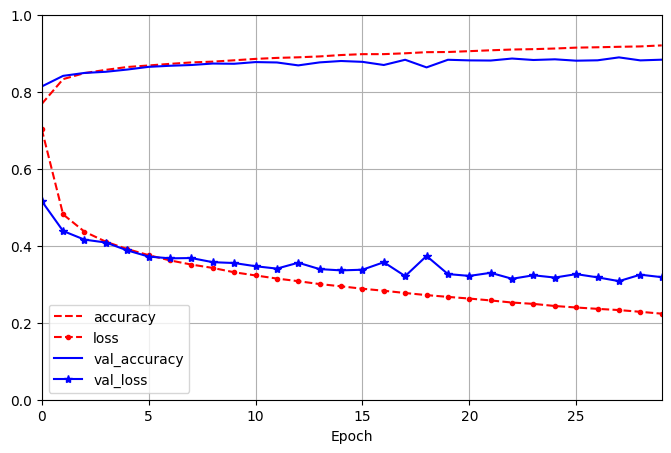

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot the learning curves (loss and accuracy) over the epochs
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()


In [8]:
# Use the trained model to make predictions on a few test instances
X_new = X_test[:3]
y_proba = model.predict(X_new)

# Display the predicted probabilities
print(y_proba.round(2))

# Get the class predictions based on the highest probability
y_pred = y_proba.argmax(axis=-1)

# Map the predicted class indices to class names
print(np.array(class_names)[y_pred])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.   0.   0.   0.   0.   0.03 0.   0.02 0.   0.95]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
['Ankle boot' 'Pullover' 'Trouser']


The model uses softmax on the output layer to handle multi-class classification.

ReLU activation functions are used in the hidden layers, helping the model learn non-linear decision boundaries.

The model is trained for 30 epochs, and the performance is evaluated using both loss and accuracy metrics.

The predictions are made by calculating the probability distribution for each test image, and the argmax function is used to select the class with the highest probability.

This approach works well for simple image classification tasks like Fashion MNIST, and you can tweak the architecture, optimizer, and training strategy for different results or more complex datasets

This section describes how to build and train a deep neural network model in TensorFlow using the Keras API, focusing on some advanced techniques like normalization, multi-input models, auxiliary outputs, and saving/loading models. Below is a breakdown of the key concepts:

1. Model Construction:
Normalization Layer: A Normalization layer is used as the first layer in the model. It works similarly to StandardScaler in Scikit-Learn and must be fitted to the training data using the adapt() method before training the model.
Sequential Model: A simple feedforward model is created with three hidden layers, each with 50 neurons and ReLU activation. The final output layer predicts a single continuous value.
Optimizer: Adam optimizer with a learning rate of
1
×
1
0
−
3
1×10
−3
  is used for optimization.
2. Multiple Inputs (Wide and Deep Model):
Wide and Deep Model: A common architecture that splits features into two parts:
Wide Path: Uses shallow layers for quick feature extraction.
Deep Path: Uses deeper layers to model complex relationships between features.
Inputs: The model receives two sets of features: one for the "wide" path (first 5 features) and one for the "deep" path (features from index 2 to 7).
3. Auxiliary Outputs:
Additional Output: The model is extended with an auxiliary output to help regularize the model. This output is used as an additional task, usually for improving the main task’s performance.
Loss Weights: When compiling the model, you can assign different weights to each output’s loss to prioritize the main task over the auxiliary task.
4. Saving and Restoring Models:
Saving a Model: A trained model can be saved in TensorFlow's format using model.save().
Loading a Model: You can reload the saved model later using tf.keras.models.load_model() to make predictions or evaluate it again.
5. Using Callbacks:
ModelCheckpoint: Saves the model weights at regular intervals during training.
EarlyStopping: Stops training early if the validation loss doesn’t improve, preventing overfitting.
Custom Callback: Custom callbacks can be created to monitor specific metrics (e.g., printing the ratio of validation loss to training loss at the end of each epoch).
TensorBoard: A callback that logs metrics for visualization using TensorBoard. It tracks various outputs such as scalars, histograms, images, and audio.
6. TensorBoard for Visualization:
Logging: You can use TensorBoard to visualize metrics, including loss curves and histograms, to analyze training performance.
Profiling: TensorBoard can also be used to profile the model’s performance during training by monitoring specific operations.
This section is particularly useful when you want to build a flexible and scalable model, such as those involving multiple feature sets, auxiliary tasks, and extensive training monitoring. You also learn how to save and resume model training, which is essential for real-world machine learning applications

In [26]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize the data
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
norm_layer.adapt(X_train)

# Build the model
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Evaluate the model on the test set
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")

# Make predictions on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(f"Predictions: {y_pred}")

# Save the model (using the .keras extension for TensorFlow's SavedModel format)
model.save("my_keras_model.keras")

# Load the model
loaded_model = tf.keras.models.load_model("my_keras_model.keras")

# Make predictions with the loaded model
y_pred = loaded_model.predict(X_new)
print(f"Predictions from loaded model: {y_pred}")




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - RootMeanSquaredError: 1.1796 - loss: 1.4656 - val_RootMeanSquaredError: 0.6886 - val_loss: 0.4742
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6276 - loss: 0.3943 - val_RootMeanSquaredError: 0.6356 - val_loss: 0.4040
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - RootMeanSquaredError: 0.6011 - loss: 0.3626 - val_RootMeanSquaredError: 0.6175 - val_loss: 0.3813
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 0.5867 - loss: 0.3444 - val_RootMeanSquaredError: 0.6272 - val_loss: 0.3933
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5672 - loss: 0.3219 - val_RootMeanSquaredError: 0.6074 - val_loss: 0.3689
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5682 - loss: 0.3230 - val_RootMeanSquaredError: 0.6213 - val_loss: 0.3860
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5603 - loss: 0.3141 -

In [13]:
# Define callbacks for checkpoints and early stopping
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5", save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# Custom callback to display validation/train loss ratio
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

# Fit with custom callback
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, PrintValTrainRatioCallback()])

# Setup TensorBoard callback
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

# Fit with TensorBoard callback
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

# Example of logging custom scalar, histogram, image, text, and audio
import numpy as np
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))

with writer.as_default():
    for step in range(1, 1001):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) * step / 1000
        tf.summary.image("my_images", images, step=step)
        texts = [f"The step is {step}", f"Its square is {step ** 2}"]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.4957 - loss: 0.2459 - val_RootMeanSquaredError: 0.5406 - val_loss: 0.2922
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 0.4941 - loss: 0.2444 - val_RootMeanSquaredError: 0.5560 - val_loss: 0.3091
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.4968 - loss: 0.2469 - val_RootMeanSquaredError: 0.5493 - val_loss: 0.3018
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.4973 - loss: 0.2475 - val_RootMeanSquaredError: 0.5399 - val_loss: 0.2915
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 0.4952 - loss: 0.2454 - val_RootMeanSquaredError: 0.5459 - val_loss: 0.2980
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.4942 - loss: 0.2444 - val_RootMeanSquaredError: 0.5483 - val_loss: 0.3007
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.4965 - los

In [28]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# Reshape the data to be (num_samples, 28, 28, 1) as the model expects
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_valid = X_valid.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Define the model-building function
def build_model(hp):
    # Hyperparameters
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer_choice = hp.Choice("optimizer", values=["sgd", "adam"])

    # Define optimizer
    if optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Build the model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(28, 28, 1)))  # Input layer with correct shape for MNIST
    model.add(tf.keras.layers.Flatten())  # Flatten the input images to 1D vector
    for _ in range(n_hidden):  # Hidden layers
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))  # Output layer

    # Compile the model
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

# Hyperparameter tuning using RandomSearch
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_mnist",
    project_name="random_search",
    seed=42
)

# Fit the model with the RandomSearch tuner
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

# Get the top 3 models from the RandomSearch
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

# Get the best hyperparameters of the best model
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
print(top3_params[0].values)  # Best hyperparameter values

# Get trial summary for the best trial
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
print(best_trial.summary())
print(best_trial.metrics.get_last_value("val_accuracy"))

# Training the best model on the full training data
best_model.fit(X_train, y_train, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_valid, y_valid)
print(f"Test accuracy: {test_accuracy}")


Trial 5 Complete [00h 01m 11s]
val_accuracy: 0.8476999998092651

Best val_accuracy So Far: 0.9652000069618225
Total elapsed time: 00h 06m 06s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


{'n_hidden': 4, 'n_neurons': 74, 'learning_rate': 0.00905127409782462, 'optimizer': 'adam'}
Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.9652000069618225
None
0.9652000069618225
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9669 - loss: 0.1533
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9723 - loss: 0.1162
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9697 - loss: 0.1367
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9720 - loss: 0.1204
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9718 - loss: 0.1142
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9752 - loss: 0.1131
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9761 - loss: 0.1187
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0853
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━